In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import umap
%matplotlib inline

2022-07-12 20:43:59.361701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 20:43:59.361722: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
sns.set(style='white', rc={'figure.figsize':(10,10)})

In [14]:
digits = sklearn.datasets.load_digits()
digits.data.shape  # (num, features)

(1797, 64)

In [4]:
# Plane embeddings
plane_mapper = umap.UMAP(random_state=42).fit(digits.data)

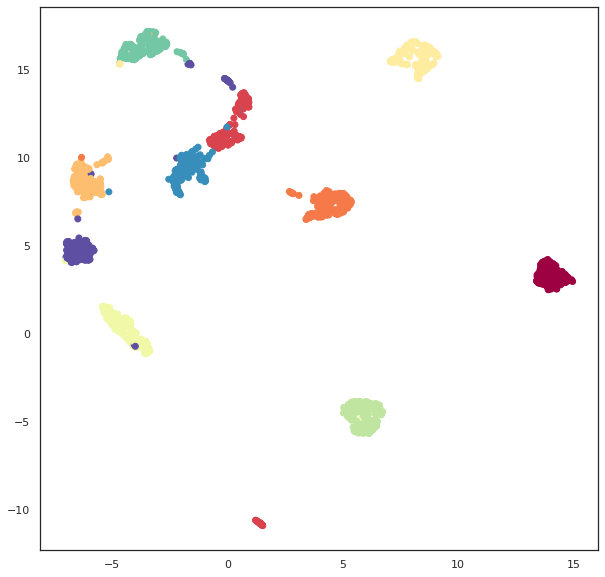

In [5]:
plt.scatter(plane_mapper.embedding_.T[0], plane_mapper.embedding_.T[1], c=digits.target, cmap='Spectral')

In [6]:
# Spherical embeddings
sphere_mapper = umap.UMAP(output_metric='haversine', random_state=42).fit(digits.data)

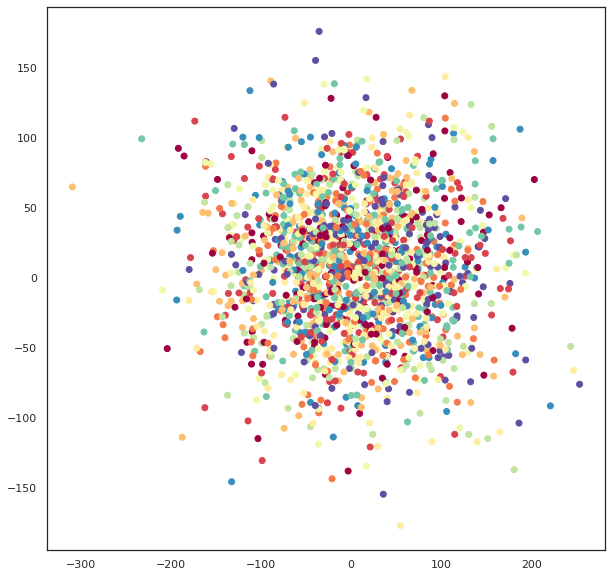

In [8]:
# The catch is that if we visualize this naively then we will get nonsense.
plt.scatter(sphere_mapper.embedding_.T[0], sphere_mapper.embedding_.T[1], c=digits.target, cmap='Spectral')

In [7]:
# We can, however, use straightforward formulas to map this data onto a sphere embedded in 3d-space.
x = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
y = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
z = np.cos(sphere_mapper.embedding_[:, 0])

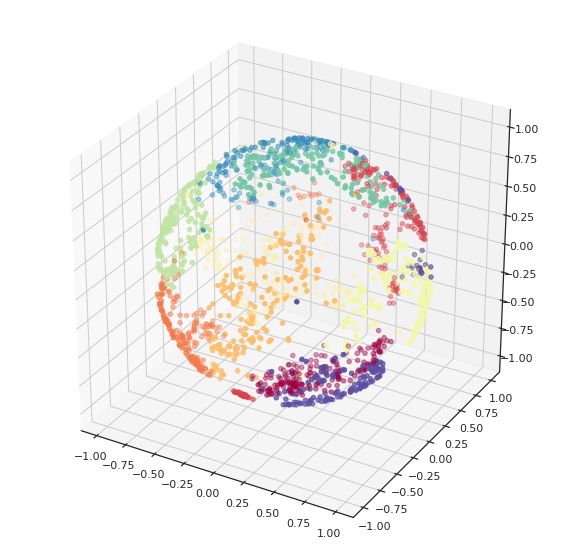

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=digits.target, cmap='Spectral')

In [10]:
x = np.arctan2(x, y)
y = -np.arccos(z)

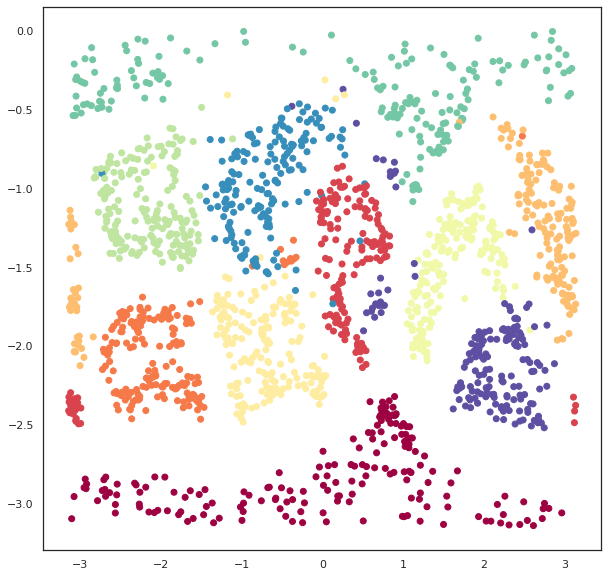

In [11]:
# If you prefer a 2d plot we can convert these into lat/long coordinates in the appropriate ranges and get the equivalent of a map projection of the sphere data.
plt.scatter(x, y, c=digits.target.astype(np.int32), cmap='Spectral')